In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import SHMF, CSMF
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


In [2]:
acc_data = np.load("../../data/12_4_0/numpy/acc_mass.npy")

surv_data = np.load("../../data/12_4_0/numpy/surv_mass.npy")

as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")

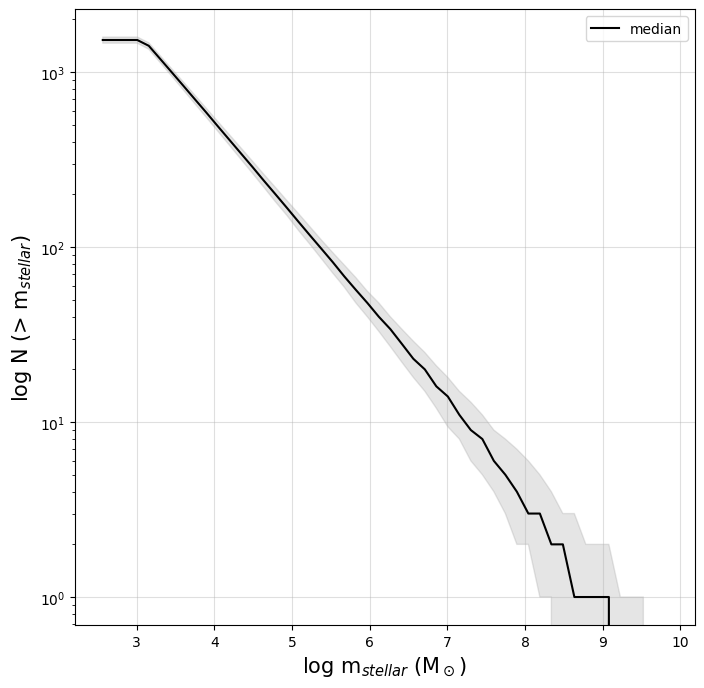

In [3]:
acc_massr, acc_CSMF = CSMF(acc_data)

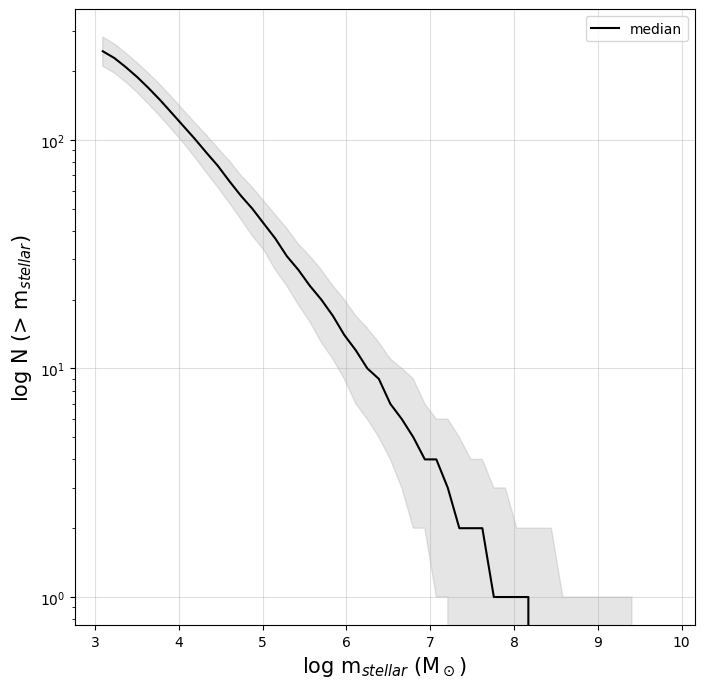

In [4]:
as_massr, as_CSMF = CSMF(as_data)

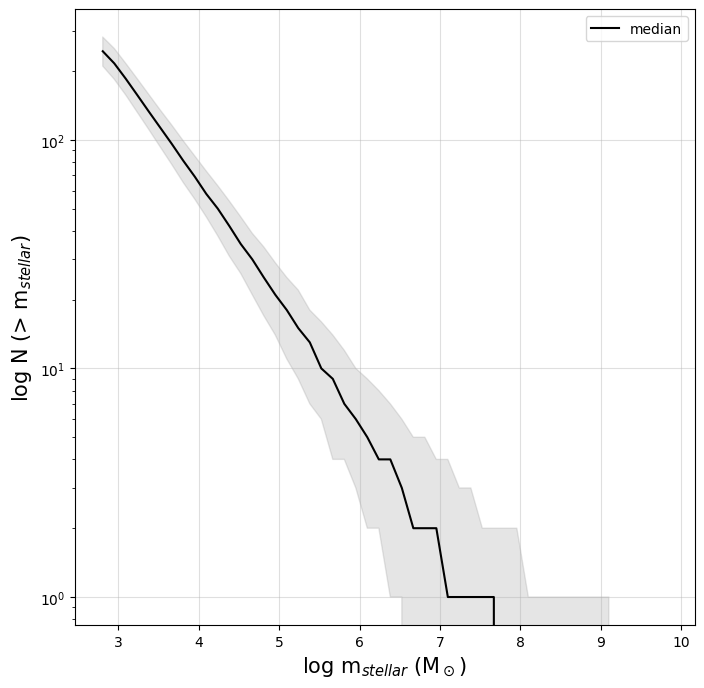

In [5]:
surv_massr, surv_CSMF = CSMF(surv_data)

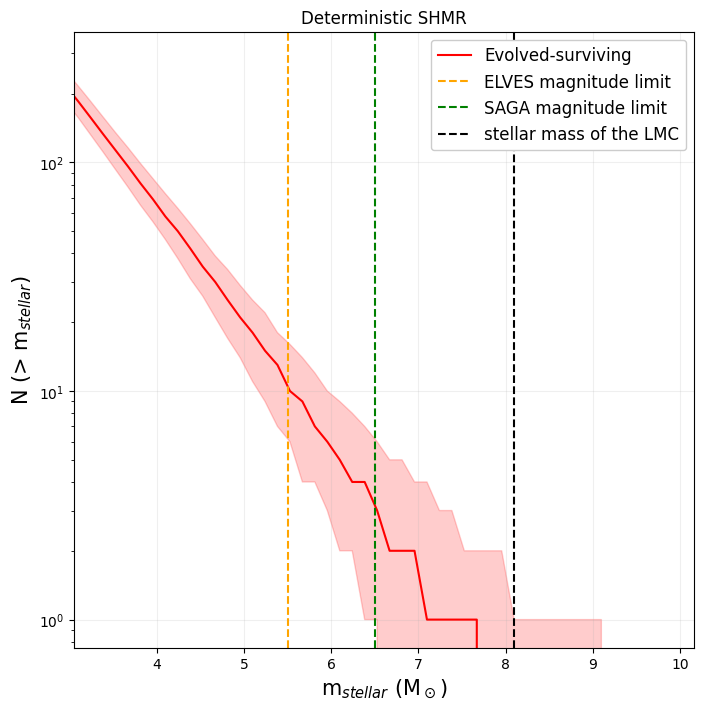

In [21]:
plt.figure(figsize=(8, 8))

plt.title("Deterministic SHMR")
#plt.plot(acc_massr, acc_CSMF[1, :], label="Unevolved", color="black")
#plt.fill_between(acc_massr, y1=acc_CSMF[0, :], y2=acc_CSMF[2, :], alpha=0.2, color="black")

plt.plot(surv_massr, surv_CSMF[1, :], label="Evolved-surviving", color="red")
plt.fill_between(surv_massr, y1=surv_CSMF[0, :], y2=surv_CSMF[2, :], alpha=0.2, color="red")

#plt.plot(as_massr, as_CSMF[1, :], label="Unevolved-surviving", color="navy")
#plt.fill_between(as_massr, y1=as_CSMF[0, :], y2=as_CSMF[2, :], alpha=0.2, color="navy")


plt.axvline(5.5, ls="--", color='orange', label="ELVES magnitude limit")
plt.axvline(6.5, ls="--", color='green', label="SAGA magnitude limit")
plt.axvline(8.1, ls="--", color='black', label="stellar mass of the LMC")


plt.yscale("log", base=10)

plt.xlabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.xlim(3.05)
plt.legend(fontsize=12, framealpha=1)
plt.grid(alpha=0.2)
plt.savefig("../figures/determ_CSMF.png")

plt.show()
